<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*

## Notebook 9: Discrete random variables
In this Notebook you learn how to deal with discrete random variables. Many of the functions we will use are included in the `random` subpackage of `numpy`. We will import this package and call it `rnd` so that we don't have to type `np.random.` all the time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

### Random numbers
A random number generator lets you draw, at random, a number from a specified distribution. Several random number generators are included in the `random` subpackage of `numpy`. For example, the `ranint(low, high, size)` function returns an integer array of shape `size` at random from `low` up to (but not including) `high`. For example, let's flip a coin 10 times and assign a 0 to heads and a 1 to tails. Note that the `high` is specified as `1 + 1`, which means it is `1` higher than the value we want.

In [2]:
rnd.randint(0, 1 + 1, 10)

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

If we call the `ran_int` function again, we get a different sequence of heads (zeros) and tails (ones):

In [3]:
rnd.randint(0, 1 + 1, 10)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

Internally, the random number generator starts with what is called a *seed*. The seed is a number and is generated automatically (and supposedly at random) when you call the random number generator. The value of the seed exactly defines the sequence of random numbers that you get (so some people may argue that the generated sequence is at best pseudo-random, and you may not want to use the sequence for any serious cryptographic use, but for our purposes they are random enough). For example, let's set `seed` equal to 10

In [4]:
rnd.seed(10)
rnd.randint(0, 1 + 1, 10)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

If we now specify the seed again as 10, we can generate the exact same sequence

In [5]:
rnd.seed(10)
rnd.randint(0, 1 + 1, 10)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

The ability to generate the exact same sequence is useful during code development. For example, by seeding the random number generator, you can compare your output to output of others trying to solve the same problem.

### Flipping a coin
Enough for now about random number generators. Let's flip a coin 100 times and count the number of heads (0-s) and the number of tails (1-s):

In [6]:
flip = rnd.randint(0, 1 + 1, 100)
headcount = 0
tailcount = 0
for i in range(100):
    if flip[i] == 0:
        headcount += 1
    else:
        tailcount += 1
print('number of heads:', headcount)
print('number of tails:', tailcount)

number of heads: 59
number of tails: 41


First of all, note that the number of heads and the number of tails add up to 100. Also, note how we counted the heads and tails. We created counters `headcount` and `tailcount`, looped through all flips, and added 1 to the appropriate counter. Instead of a loop, we could have used a condition for the indices combined with a summation as follows

In [7]:
headcount = np.count_nonzero(flip == 0)
tailcount = np.count_nonzero(flip == 1)
print('headcount', headcount)
print('tailcount', tailcount)

headcount 59
tailcount 41


How does that work? You may recall that the `flip == 0` statement returns an array with length 100 (equal to the lenght of `flip`) with the value `True` when the condition is met, and `False` when the condition is not met. The boolean `True` has the value 1, and the boolean `False` has the value 0. So we simply need to count the nonzero values using the `np.count_nonzero` function to find out how many items are `True`. 

The code above is easy, but if we do an experiment with more than two outcomes, it may be cumbersome to count the non-zero items for every possible outcome. So let's try to rewrite this part of the code using a loop. For this specific case the number of lines of code doesn't decrease, but when we have an experiment with many different outcomes this will be much more efficient. Note that `dtype='int'` sets the array to integers.

In [8]:
outcomes = np.zeros(2, dtype='int') # Two outcomes. heads are stored in outcome[0], tails in outcome[1]
for i in range (2):
    outcomes[i] = np.count_nonzero(flip == i)
    print('outcome ', i, ' is ', outcomes[i])

outcome  0  is  59
outcome  1  is  41


### Exercise 1. <a name="back1"></a>Throwing a dice
Throw a dice 100 times and report how many times you throw 1, 2, 3, 4, 5, and 6. Use a seed of 33. Make sure that the reported values add up to 100. Make sure you use a loop in your code as we did in the previous code cell.

<a href="#ex1answer">Answers to Exercise 1</a>

### Flipping a coin twice
Next we are going to flip a coin twice for 100 times and count the number of tails. We generate a random array of 0-s (heads) and 1-s (tails) with two rows (representing two coin flips) and 100 colums. The sum of the two rows represents the number of tails. The `np.sum` function takes an array and by default sums all the values in the array and returns one number. In this case we want to sum the rows. For that, the `sum` function has a keyword argument called `axis`, where `axis=0` sums over index 0 of the array (the rows), `axis=1` sums over the index 1 of the array (the columns), etc.

In [9]:
rnd.seed(55)
flips = rnd.randint(low=0, high=1 + 1, size=(2, 100))
tails = np.sum(flips, axis=0)
number_of_tails = np.zeros(3, dtype='int')
for i in range(3):
    number_of_tails[i] = np.count_nonzero(tails == i)
print('number of 0, 1, 2 tails:', number_of_tails)

number of 0, 1, 2 tails: [27 47 26]


Another way to simulate flipping a coin twice, is to draw a number at random from a set of 2 numbers (0 and 1). You need to replace the number after every draw, of course. The `numpy` function to draw a random number from a given array is called `choice`. The `choice` function has a keyword to specify whether values are replaced or not. Hence the following two ways to generate 5 flips are identical.

In [10]:
rnd.seed(55)
flips1 = rnd.randint(low=0, high=1 + 1, size=5)
rnd.seed(55)
flips2 = rnd.choice(range(2), size=5, replace=True)
np.alltrue(flips1 == flips2)  # Check whether all values in the two arrays are equal

True

### Bar graph
The outcome of the experiment may also be plotted with a bar graph

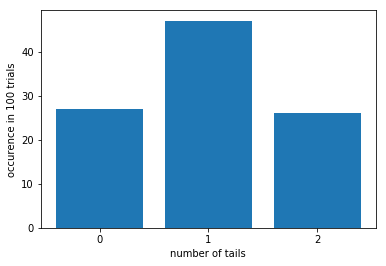

In [11]:
plt.bar(range(0, 3), number_of_tails)
plt.xticks(range(0, 3))
plt.xlabel('number of tails')
plt.ylabel('occurence in 100 trials');

### Cumulative Probability
Next we compute the experimental probability of 0 tails, 1 tail, and 2 tails through division by the total number of trials (one trial is two coin flips). The three probabilities add up to 1. The cumulative probability distribution is obtained by cumulatively summing the probabilities using the `cumsum` function of `numpy`. The first value is the probability of throwing 0 tails. The second value is the probability of 1 or fewer tails, and the third value it the probability of 2 or fewer tails. The probability is computed as the number of tails divided by the total number of trials.

In [12]:
prob = number_of_tails / 100  # number_of_tails was computed two code cells back
cum_prob = np.cumsum(prob) # So cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], etc.
print('cum_prob ', cum_prob)

cum_prob  [ 0.27  0.74  1.  ]


The cumulative probability distribution is plotted with a bar graph, making sure that all the bars touch each other (by setting the width to 1, in the case below)

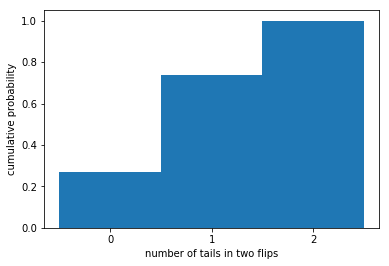

In [13]:
plt.bar(range(0, 3), cum_prob, width=1)
plt.xticks(range(0, 3))
plt.xlabel('number of tails in two flips')
plt.ylabel('cumulative probability');

### Exercise 2. <a name="back2"></a>Flip a coin five times
Flip a coin five times in a row and record how many times you obtain tails (varying from 0-5). Perform the exeriment 1000 times. Make a bar graph with the total number of tails on the horizontal axis and the emperically computed probability to get that many tails, on the vertical axis. Execute your code several times (hit [shift]-[enter]) and see that the graph changes a bit every time, as the sequence of random numbers changes every time. 

Compute the cumulative probability. Print the values to the screen and make a plot of the cumulative probability function using a bar graph.

<a href="#ex2answer">Answers to Exercise 2</a>

### Probability of a Bernouilli variable
In the previous exercise, we computed the probability of a certain number of heads in five flips experimentally. But we can, of course, compute the value exactly by using a few simple formulas. Consider the random variable $Y$, which is the outcome of an experiment with two possible values 0 and 1. Let $p$ be the probability of success, $p=P(Y=1)$. 
Then $Y$ is said to be a Bernoulli variable. The experiment is repeated $n$ times and we define $X$ as the number of successes in the experiment. The variable $X$ has a Binomial Distribution with parameters $n$ and $p$. The probability that $X$ takes value $k$ can be computed as (see for example [here](http://en.wikipedia.org/wiki/Binomial_distribution))

$$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$$

The term $\binom{n}{k}$ may be computed with the `comb` function, which needs to be imported from the `scipy.misc` package.

### Exercise 3. <a name="back3"></a>Flip a coin 5 times revisited
Go back to the experiment where we flip a coin five times in a row and record how many times we obtain tails.
Compute the theoretical probability for 0, 1, 2, 3, 4, and 5 tails and compare your answer to the probability computed from 1000 trials, 10000 trials, and 100000 trials (use a loop for these three sets of trials). Do you approach the theoretical value with more trials?

<a href="#ex3answer">Answers to Exercise 3</a>

### Exercise 4. <a name="back4"></a>Maximum value of two dice throws
Throw a dice two times and record the maximum value of the two throws. Use the `np.max` function to compute the maximum value. Like the `np.sum` function, the `np.max` function takes an array as input argument and an optional keyword argument named `axis`. Perform the experiment 1000 times and compute the probability that the highest value is 1, 2, 3, 4, 5, or 6. Make a graph of the cumulative probability distribution function using a step graph.

<a href="#ex4answer">Answers to Exercise 4</a>

### Exercise 5. <a name="back5"></a>Maximum value of two dice throws revisited
Refer back to Exercise 4.
Compute the theoretical value of the probability of the highest dice when throwing the dice twice (the throws are labeled T1 and T2, respectively). There are 36 possible outcomes for this experiment. Let $M$ denote the random variable corresponding to this experiment (this means for instance that $M=3$ when your first throw is a 2, and the second throw is a 3). All outcomes of $M$ can easily be written down, as shown in the following Table: 

| T1$\downarrow$ T2$\to$ | 1 | 2 | 3 | 4 | 5 | 6 |
|-----------:|------------:|:------------:|
|  1 | 1 | 2 | 3 | 4 | 5 | 6 |
|  2 | 2 | 2 | 3 | 4 | 5 | 6 |
|  3 | 3 | 3 | 3 | 4 | 5 | 6 |
|  4 | 4 | 4 | 4 | 4 | 5 | 6 |
|  5 | 5 | 5 | 5 | 5 | 5 | 6 |
|  6 | 6 | 6 | 6 | 6 | 6 | 6 |


Use the 36 possible outcomes shown in the Table to compute the theoretical probability of $M$ being 1, 2, 3, 4, 5, or 6. Compare the theoretical outcome with the experimental outcome for 100, 1000, and 10000 dice throws.

<a href="#ex5answer">Answers to Exercise 5</a>

### Generate random integers with non-equal probabilities
So far, we have generated random numbers of which the probability of each outcome was the same (heads or tails, or the numbers on a dice, considering the throwing device was "fair"). What now if we want to generate outcomes that don't have the same probability? For example, consider the case that we have a bucket with 4 blue balls and 6 red balls. When you draw a ball at random, the probability of a blue ball is 0.4 and the probability of a red ball is 0.6. A sequence of drawing ten balls, with replacement, may be generated as follows

In [14]:
balls = np.zeros(10, dtype='int') # zero is blue
balls[4:] = 1  # one is red
print('balls:', balls)
drawing = rnd.choice(balls, 10, replace=True)
print('drawing:', drawing)
print('blue balls:', np.count_nonzero(drawing == 0))
print('red balls:', np.count_nonzero(drawing == 1))

balls: [0 0 0 0 1 1 1 1 1 1]
drawing: [1 1 1 0 1 0 0 1 1 0]
blue balls: 4
red balls: 6


### Exercise 6. <a name="back6"></a>Election poll
Consider an election where one million people will vote. 490,000 people will vote for candidate $A$ and 510,000 people will vote for candidate $B$. One day before the election, the company of 'Maurice the Dog' conducts a pole among 1000 randomly chosen voters. Compute whether the Dog will predict the winner correctly using the approach explained above and a seed of 2.

Perform the pole 1000 times. Count how many times the outcome of the pole is that candidate $A$ wins and how many times the outcome of the pole is that candidate $B$ wins. What is the probability that the Dog will predict the correct winner based on these 1000 poles of 1000 people? 

Compute the probability that the Dog will predict the correct winner based on 1000 poles of 5000 people? Does the probability that The Dog predicts the correct winner increase significantly when he poles 5000 people?

<a href="#ex6answer">Answers to Exercise 6</a>

### Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

In [15]:
rnd.seed(33)
dicethrow = rnd.randint(1, 6 + 1, 100)
side = np.zeros(6, dtype='int')
for i in range(6):
    side[i] = np.count_nonzero(dicethrow == i + 1)
    print('number of times', i + 1, 'is', side[i])
print('total number of throws ', sum(side))

number of times 1 is 17
number of times 2 is 17
number of times 3 is 15
number of times 4 is 24
number of times 5 is 19
number of times 6 is 8
total number of throws  100


<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

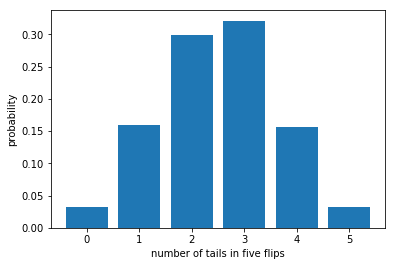

In [16]:
N = 1000
tails = np.sum(rnd.randint(0, 1 + 1, (5, 1000)), axis=0)
counttails = np.zeros(6, dtype='int')
for i in range(6):
    counttails[i] = np.count_nonzero(tails == i)
plt.bar(range(0, 6), counttails / N)
plt.xlabel('number of tails in five flips')
plt.ylabel('probability');

cumprob: [ 0.033  0.192  0.491  0.812  0.968  1.   ]


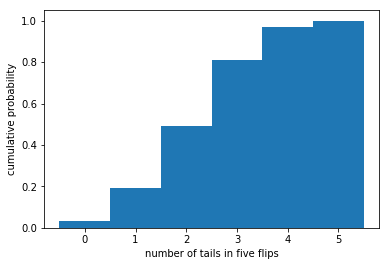

In [17]:
cumprob = np.cumsum(counttails / N)
print('cumprob:', cumprob)
plt.bar(range(0, 6), cumprob, width=1)
plt.xlabel('number of tails in five flips')
plt.ylabel('cumulative probability');

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [18]:
from scipy.misc import comb
print('Theoretical probabilities:')
for k in range(6):
    print(k, ' tails ', comb(5, k) * 0.5 ** k * 0.5 ** (5 - k))
for N in (1000, 10000, 100000):
    tails = np.sum(rnd.randint(0, 1 + 1, (5, N)), axis=0)
    counttails = np.zeros(6)
    for i in range(6):
        counttails[i] = np.count_nonzero(tails==i)
    print('Probability with', N, 'trials: ', counttails / float(N))

Theoretical probabilities:
0  tails  0.03125
1  tails  0.15625
2  tails  0.3125
3  tails  0.3125
4  tails  0.15625
5  tails  0.03125
Probability with 1000 trials:  [ 0.031  0.16   0.307  0.334  0.139  0.029]
Probability with 10000 trials:  [ 0.0315  0.1579  0.3083  0.3098  0.1634  0.0291]
Probability with 100000 trials:  [ 0.03093  0.15591  0.31454  0.31266  0.15484  0.03112]


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

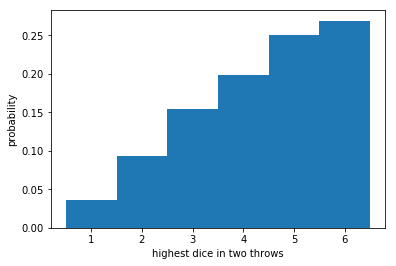

In [19]:
dice = rnd.randint(1, 6 + 1, (2, 1000))
highest_dice = np.max(dice, 0)
outcome = np.zeros(6)
for i in range(6):
    outcome[i] = np.sum(highest_dice == i + 1) / 1000
plt.bar(left=np.arange(1, 7), height=outcome, width=1)
plt.xlabel('highest dice in two throws')
plt.ylabel('probability');

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

In [20]:
for N in [100, 1000, 10000]:
    dice = rnd.randint(1, 6 + 1, (2, N))
    highest_dice = np.max(dice, axis=0)
    outcome = np.zeros(6)
    for i in range(6):
        outcome[i] = np.sum(highest_dice == i + 1) / N
    print('Outcome for', N, 'throws: ', outcome)
# Exact values
exact = np.zeros(6)
for i, j in enumerate(range(1, 12, 2)):
    exact[i] = j / 36
print('Exact probabilities: ',exact)

Outcome for 100 throws:  [ 0.01  0.03  0.19  0.13  0.27  0.37]
Outcome for 1000 throws:  [ 0.035  0.076  0.142  0.189  0.262  0.296]
Outcome for 10000 throws:  [ 0.0258  0.0862  0.1323  0.1924  0.248   0.3153]
Exact probabilities:  [ 0.02777778  0.08333333  0.13888889  0.19444444  0.25        0.30555556]


<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

In [21]:
rnd.seed(2)
people = np.zeros(1000000, dtype='int')  # candidate A is 0
people[490000:] = 1  # candidate B is 1
pole = rnd.choice(people, 1000)
poled_for_A = np.count_nonzero(pole == 0)
print('poled for A:', poled_for_A)
if poled_for_A > 500: 
    print('The Dog will predict the wrong winner')
else:
    print('The Dog will predict the correct winner')

poled for A: 508
The Dog will predict the wrong winner


In [22]:
Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # candidate A is 0
    people[490000:] = 1  # candidate B is 1
    pole = rnd.choice(people, 1000)
    poled_for_A = np.count_nonzero(pole == 0)
    if poled_for_A > 500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 poles of 1000 people')
print('Probability that The Dog predicts candidate A to win:', Awins / 1000)

1000 poles of 1000 people
Probability that The Dog predicts candidate A to win: 0.267


In [23]:
Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # candidate A is 0
    people[490000:] = 1  # candidate B is 1
    pole = rnd.choice(people, 5000)
    poled_for_A = np.count_nonzero(pole == 0)
    if poled_for_A > 2500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 poles of 5000 people')
print('Probability that The Dog predicts candidate A to win:', Awins / 5000)

1000 poles of 5000 people
Probability that The Dog predicts candidate A to win: 0.014


<a href="#back6">Back to Exercise 6</a>